<a href="https://colab.research.google.com/github/Ameeghai/Quantum-RNG-Hybrid/blob/main/Quantum_random_number_generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit

In [2]:
!pip install qiskit_aer

In [3]:
!pip install pylatexenc


Shot-noise bits (initial classical randomness):
[1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1]

Example random number generated: 1766896316
Shannon entropy: 10.9658 bits (max = 32)
Min-entropy: 10.9658 bits


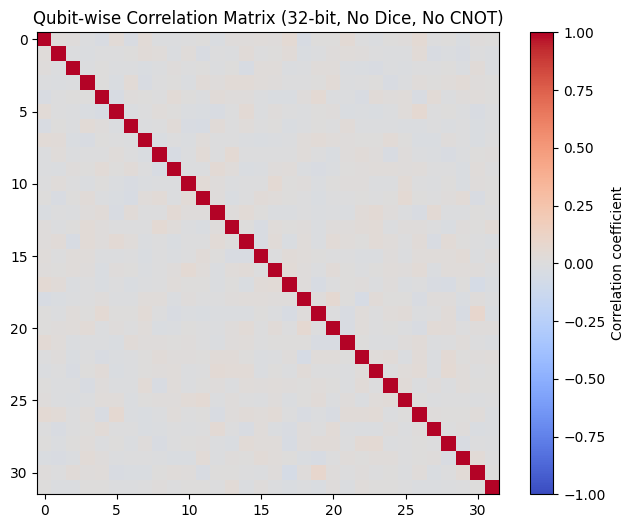

Average off-diagonal correlation = 0.0171

First 20 measurement sequences (shots):
[[0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0]
 [1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0]
 [0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 0]
 [0 1 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0]
 [0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0]
 [1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1]
 [0 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1]
 [1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0]
 [0 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1]
 [0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1]
 [0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 1 

In [12]:
# Hybrid QRNG: 32-bit, No Dice, No CNOT (2000 shots)
import numpy as np
import random
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Generate 32-bit Shot-Noise String
# ----------------------------
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)
print("Shot-noise bits (initial classical randomness):")
print(shot_noise_bits)

# ----------------------------
# Step 2: Initialize Quantum Circuit
# ----------------------------
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Apply Hadamard for Superposition
# ----------------------------
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: No Dice, direct measurement
# ----------------------------
qc.measure(range(32), range(32))

# ----------------------------
# Step 5: Show Quantum Circuit
# ----------------------------
qc.draw(output='mpl', fold=-1)
plt.show()

# ----------------------------
# Step 6: Run Simulation
# ----------------------------
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=2000).result()
counts = result.get_counts()

# ----------------------------
# Step 7: Example Random Number
# ----------------------------
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"\nExample random number generated: {random_number}")

# ----------------------------
# Step 8: Shannon & Min-Entropy
# ----------------------------
entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

# ----------------------------
# Step 9: Qubit-wise correlation matrix
# ----------------------------
bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (32-bit, No Dice, No CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

# ----------------------------
# Step 10: First 20 measurement sequences (visual check)
# ----------------------------
print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])


Shot-noise bits (initial classical randomness):
[1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 1]

Example random number generated: 2779394142
Shannon entropy: 12.2877 bits (max = 32)
Min-entropy: 12.2877 bits


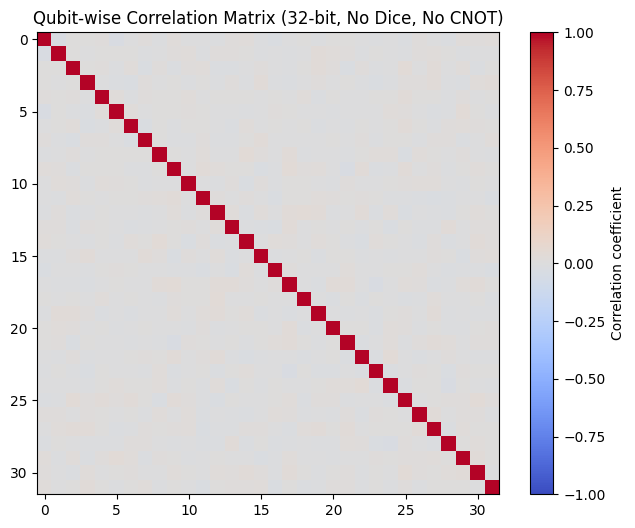

Average off-diagonal correlation = 0.0114

First 20 measurement sequences (shots):
[[0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1]
 [1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0]
 [0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1]
 [1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1]
 [0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1]
 [0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0]
 [1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1]
 [0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0]
 [1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 0]
 [1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1]
 [1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1]
 [0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 0]
 [1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1]
 [0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 

In [13]:
# Hybrid QRNG: 32-bit, No Dice, No CNOT (5000 shots)
import numpy as np
import random
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import Aer
import matplotlib.pyplot as plt

# ----------------------------
# Step 1: Generate 32-bit Shot-Noise String
# ----------------------------
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)
print("Shot-noise bits (initial classical randomness):")
print(shot_noise_bits)

# ----------------------------
# Step 2: Initialize Quantum Circuit
# ----------------------------
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Apply Hadamard for Superposition
# ----------------------------
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: No Dice, direct measurement
# ----------------------------
qc.measure(range(32), range(32))

# ----------------------------
# Step 5: Show Quantum Circuit
# ----------------------------
qc.draw(output='mpl', fold=-1)
plt.show()

# ----------------------------
# Step 6: Run Simulation
# ----------------------------
simulator = Aer.get_backend('aer_simulator')
result = simulator.run(qc, shots=5000).result()
counts = result.get_counts()

# ----------------------------
# Step 7: Example Random Number
# ----------------------------
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"\nExample random number generated: {random_number}")

# ----------------------------
# Step 8: Shannon & Min-Entropy
# ----------------------------
entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

# ----------------------------
# Step 9: Qubit-wise correlation matrix
# ----------------------------
bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (32-bit, No Dice, No CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

# ----------------------------
# Step 10: First 20 measurement sequences (visual check)
# ----------------------------
print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])


Shot-noise bits (initial classical randomness):
[0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1]

Example random number generated: 598628882
Shannon entropy: 10.9658 bits (max = 32)
Min-entropy: 10.9658 bits


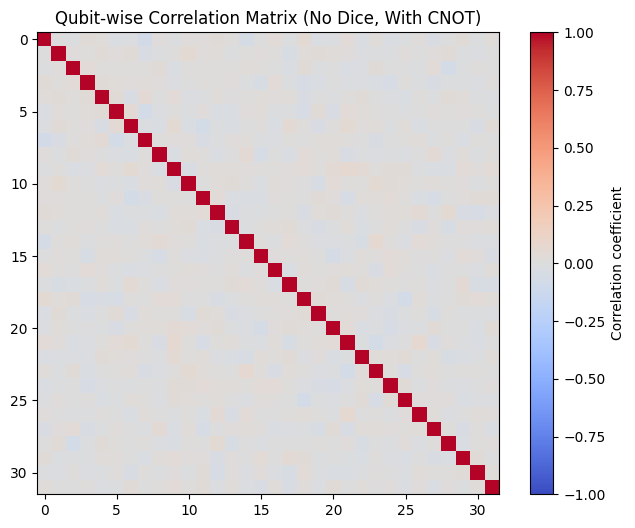

Average off-diagonal correlation = 0.0188

First 20 measurement sequences (shots):
[[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1]
 [1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0]
 [0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0]
 [0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0]
 [1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0]
 [1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1]
 [1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1]
 [1 1 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1]
 [1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1]
 [1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 1]
 [0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0]
 [0 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0]
 [1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 

In [15]:
# Hybrid QRNG: 32-bit, No Dice, With CNOT (2000 shots)
import numpy as np
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# ----------------------------
# Step 1: Generate Shot-Noise
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)
print("Shot-noise bits (initial classical randomness):")
print(shot_noise_bits)

# ----------------------------
# Step 2: Initialize Quantum Circuit
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Apply Hadamard (Superposition)
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: Random CNOT pairs (No Dice)
qubits = list(range(32))
random.shuffle(qubits)
for i in range(0, 31, 2):
    qc.cx(qubits[i], qubits[i+1])

# ----------------------------
# Step 5: Measurement
qc.measure(range(32), range(32))

# ----------------------------
# Step 6: Run Simulation
simulator = AerSimulator()
result = simulator.run(qc, shots=2000).result()
counts = result.get_counts()

# ----------------------------
# Step 7: Example Random Number
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"\nExample random number generated: {random_number}")

# ----------------------------
# Step 8: Shannon & Min-Entropy
entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

# ----------------------------
# Step 9: Correlation matrix
bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (No Dice, With CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

# ----------------------------
# Step 10: First 20 measurement sequences
print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])


Shot-noise bits (initial classical randomness):
[1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 0]

Example random number generated: 2274344145
Shannon entropy: 12.2873 bits (max = 32)
Min-entropy: 11.2877 bits


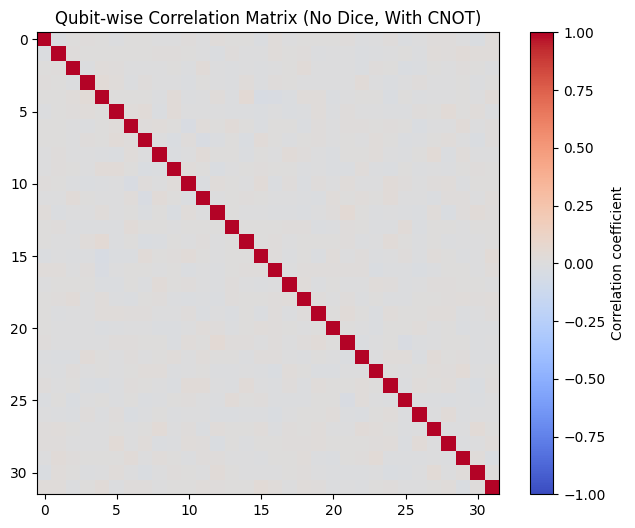

Average off-diagonal correlation = 0.0112

First 20 measurement sequences (shots):
[[1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 0]
 [1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1]
 [0 1 0 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1]
 [0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1]
 [0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1]
 [0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0]
 [1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0]
 [1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1]
 [1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0]
 [0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0]
 [0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0]
 [0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 

In [16]:
# Hybrid QRNG: 32-bit, No Dice, With CNOT (5000 shots)
import numpy as np
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# ----------------------------
# Step 1: Generate Shot-Noise
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)
print("Shot-noise bits (initial classical randomness):")
print(shot_noise_bits)

# ----------------------------
# Step 2: Initialize Quantum Circuit
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Apply Hadamard (Superposition)
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: Random CNOT pairs (No Dice)
qubits = list(range(32))
random.shuffle(qubits)
for i in range(0, 31, 2):
    qc.cx(qubits[i], qubits[i+1])

# ----------------------------
# Step 5: Measurement
qc.measure(range(32), range(32))

# ----------------------------
# Step 6: Run Simulation
simulator = AerSimulator()
result = simulator.run(qc, shots=5000).result()
counts = result.get_counts()

# ----------------------------
# Step 7: Example Random Number
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"\nExample random number generated: {random_number}")

# ----------------------------
# Step 8: Shannon & Min-Entropy
entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

# ----------------------------
# Step 9: Correlation matrix
bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (No Dice, With CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

# ----------------------------
# Step 10: First 20 measurement sequences
print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])


Example random number generated: 873074882
Shannon entropy: 10.9658 bits (max = 32)
Min-entropy: 10.9658 bits


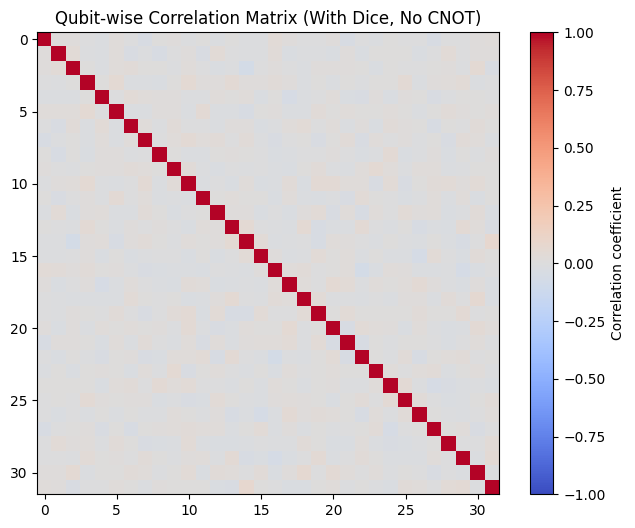

Average off-diagonal correlation = 0.0180

First 20 measurement sequences (shots):
[[0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1]
 [1 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1]
 [1 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1]
 [0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1]
 [0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0]
 [0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1]
 [0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0]
 [1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0]
 [1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1]
 [1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1]
 [1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1]
 [0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0]
 [0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 

In [17]:
# Hybrid QRNG: 32-bit, With Dice, No CNOT (2000 shots)
import numpy as np
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# ----------------------------
# Step 1: Shot-Noise
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)

# ----------------------------
# Step 2: Quantum Circuit
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Hadamard
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: Dice Measurement Order
def dice_measurement_order(num_qubits=32):
    available = list(range(num_qubits))
    order = []
    while available:
        choice = random.choice(available)
        order.append(choice)
        available.remove(choice)
    return order

measurement_order = dice_measurement_order(32)
for idx, q in enumerate(measurement_order):
    qc.measure(q, idx)

# ----------------------------
# Step 5: Run Simulation
simulator = AerSimulator()
result = simulator.run(qc, shots=2000).result()
counts = result.get_counts()

# ----------------------------
# Step 6: Random Number, Entropy, Correlation
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"Example random number generated: {random_number}")

entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (With Dice, No CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])


Example random number generated: 3050892603
Shannon entropy: 12.2877 bits (max = 32)
Min-entropy: 12.2877 bits


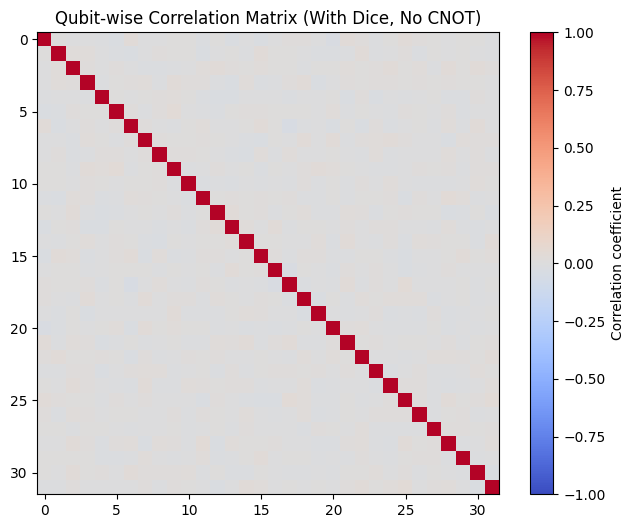

Average off-diagonal correlation = 0.0114

First 20 measurement sequences (shots):
[[0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1]
 [1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0 1 0]
 [1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1]
 [0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0]
 [1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 1]
 [1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 1]
 [0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0]
 [1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1]
 [1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1]
 [1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0]
 [1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0]
 [0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0]
 [1 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0]
 [1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 

In [18]:
# Hybrid QRNG: 32-bit, With Dice, No CNOT (5000 shots)
import numpy as np
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# ----------------------------
# Step 1: Shot-Noise
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)

# ----------------------------
# Step 2: Quantum Circuit
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Hadamard
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: Dice Measurement Order
def dice_measurement_order(num_qubits=32):
    available = list(range(num_qubits))
    order = []
    while available:
        choice = random.choice(available)
        order.append(choice)
        available.remove(choice)
    return order

measurement_order = dice_measurement_order(32)
for idx, q in enumerate(measurement_order):
    qc.measure(q, idx)

# ----------------------------
# Step 5: Run Simulation
simulator = AerSimulator()
result = simulator.run(qc, shots=5000).result()
counts = result.get_counts()

# ----------------------------
# Step 6: Random Number, Entropy, Correlation
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"Example random number generated: {random_number}")

entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (With Dice, No CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])


Example random number generated: 595616887
Shannon entropy: 10.9658 bits (max = 32)
Min-entropy: 10.9658 bits


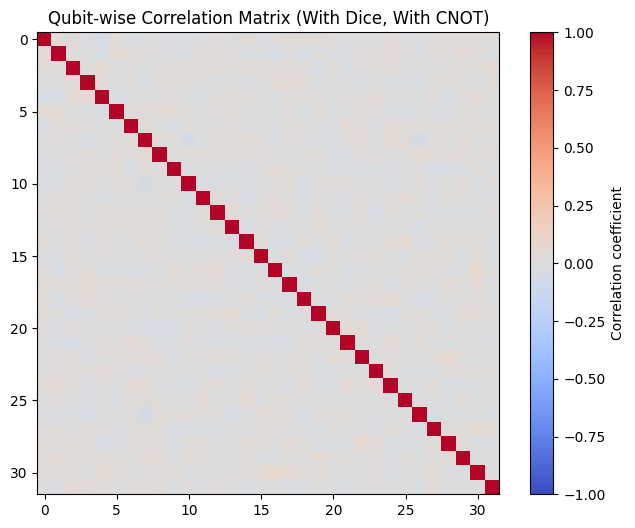

Average off-diagonal correlation = 0.0166

First 20 measurement sequences (shots):
[[0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0]
 [0 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0]
 [1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0]
 [1 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1]
 [1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1]
 [1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1]
 [0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1]
 [1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1]
 [0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0]
 [0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1]
 [1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 

In [19]:
# Hybrid QRNG: 32-bit, With Dice, With CNOT (2000 shots)
import numpy as np
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# ----------------------------
# Step 1: Shot-Noise
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)

# ----------------------------
# Step 2: Quantum Circuit
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Hadamard
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: Dice for Random CNOT Pairs
def dice_pairs(num_qubits=32):
    available = list(range(num_qubits))
    pairs = []
    while len(available) >= 2:
        d1, d2 = random.sample(available, 2)
        pairs.append((d1, d2))
        available.remove(d1)
        available.remove(d2)
    return pairs

pairs = dice_pairs(32)
for ctrl, tgt in pairs:
    qc.cx(ctrl, tgt)

# Dice measurement order
def dice_measurement_order(num_qubits=32):
    available = list(range(num_qubits))
    order = []
    while available:
        choice = random.choice(available)
        order.append(choice)
        available.remove(choice)
    return order

measurement_order = dice_measurement_order(32)
for idx, q in enumerate(measurement_order):
    qc.measure(q, idx)

# ----------------------------
# Step 5: Run Simulation
simulator = AerSimulator()
result = simulator.run(qc, shots=2000).result()
counts = result.get_counts()

# ----------------------------
# Step 6: Random Number, Entropy, Correlation
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"Example random number generated: {random_number}")

entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (With Dice, With CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])


Example random number generated: 277934150
Shannon entropy: 12.2877 bits (max = 32)
Min-entropy: 12.2877 bits


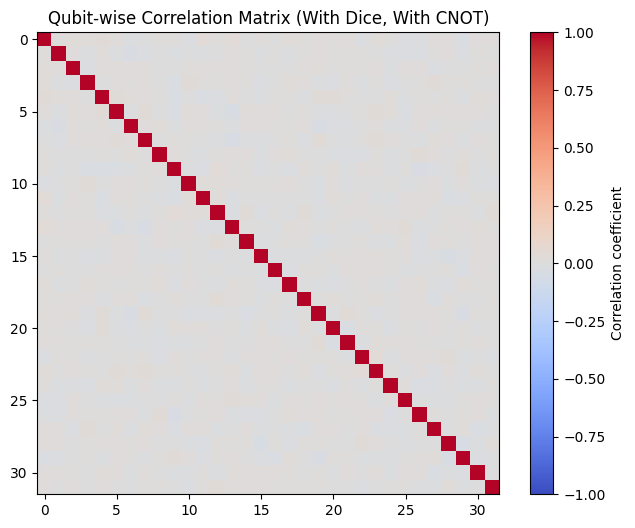

Average off-diagonal correlation = 0.0110

First 20 measurement sequences (shots):
[[1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1]
 [1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1]
 [1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0]
 [1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0]
 [1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0]
 [1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 1 1 1 1]
 [1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0]
 [1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1]
 [1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1]
 [1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1]
 [0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0]
 [0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1]
 [0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 

In [20]:
# Hybrid QRNG: 32-bit, With Dice, With CNOT (5000 shots)
import numpy as np
from math import log2
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import random

# ----------------------------
# Step 1: Shot-Noise
def generate_shot_noise_bits(length=32):
    return np.random.choice([0, 1], size=length, p=[0.5, 0.5])

shot_noise_bits = generate_shot_noise_bits(32)

# ----------------------------
# Step 2: Quantum Circuit
qc = QuantumCircuit(32, 32)
for i, bit in enumerate(shot_noise_bits):
    if bit == 1:
        qc.x(i)

# ----------------------------
# Step 3: Hadamard
for q in range(32):
    qc.h(q)

# ----------------------------
# Step 4: Dice for Random CNOT Pairs
def dice_pairs(num_qubits=32):
    available = list(range(num_qubits))
    pairs = []
    while len(available) >= 2:
        d1, d2 = random.sample(available, 2)
        pairs.append((d1, d2))
        available.remove(d1)
        available.remove(d2)
    return pairs

pairs = dice_pairs(32)
for ctrl, tgt in pairs:
    qc.cx(ctrl, tgt)

# Dice measurement order
def dice_measurement_order(num_qubits=32):
    available = list(range(num_qubits))
    order = []
    while available:
        choice = random.choice(available)
        order.append(choice)
        available.remove(choice)
    return order

measurement_order = dice_measurement_order(32)
for idx, q in enumerate(measurement_order):
    qc.measure(q, idx)

# ----------------------------
# Step 5: Run Simulation
simulator = AerSimulator()
result = simulator.run(qc, shots=5000).result()
counts = result.get_counts()

# ----------------------------
# Step 6: Random Number, Entropy, Correlation
outcomes = list(counts.keys())
probabilities = np.array(list(counts.values())) / sum(list(counts.values()))
measured_bits = np.random.choice(outcomes, p=probabilities)
random_number = int(measured_bits, 2)
print(f"Example random number generated: {random_number}")

entropy = -np.sum([p*log2(p) for p in probabilities if p>0])
min_entropy = -log2(np.max(probabilities))
print(f"Shannon entropy: {entropy:.4f} bits (max = 32)")
print(f"Min-entropy: {min_entropy:.4f} bits")

bit_matrix = np.array([list(map(int, o)) for o in np.repeat(outcomes, list(counts.values()), axis=0)])
correlation_matrix = np.corrcoef(bit_matrix.T)
plt.figure(figsize=(8,6))
plt.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation coefficient')
plt.title("Qubit-wise Correlation Matrix (With Dice, With CNOT)")
plt.show()

num_qubits = correlation_matrix.shape[0]
avg_off_diag_corr = (np.sum(np.abs(correlation_matrix)) - num_qubits) / (num_qubits*(num_qubits-1))
print(f"Average off-diagonal correlation = {avg_off_diag_corr:.4f}")

print("\nFirst 20 measurement sequences (shots):")
print(bit_matrix[:20])
